In [450]:
clear

local year 98
/* local year 1400 */

local RU R

local dir "~/Documents/Data/HEIS/`year'/csv"
/* local dir "~/Documents/Data/HEIS/100/csv" */

local dir_sum "~/Documents/Data/HEIS/DataSummary/13`year'"
/* local dir_sum "~/Documents/Data/HEIS/DataSummary/`year'" */

```TODO```
- to be added :)

# 1. Load HH monthly expenditure

## Load Data from HEIS tables

In [451]:
/* clear
local path "`dir'/R/R`year'P3S01.csv"
import delimited "`path'", delimiter(",") clear //
des

list */

In [452]:
tempfile monthly_tempfile
save `monthly_tempfile', replace empty



(note: dataset contains 0 observations)
(note: file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002v not
>  found)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002v saved


In [453]:
local tables 01 02
foreach table of local tables {
    local path "`dir'/`RU'/`RU'`year'P3S`table'.csv"
    import delimited "`path'", delimiter(",") clear //
    
    // keep only if HH has paid for it.
    drop if dycol02 != 1

    rename dycol06 value
    rename dycol01 good_code
    
    keep address good_code value

    append using `monthly_tempfile'
    save `monthly_tempfile', replace
}


local tables 03 05 06 07 08 09 11 12
foreach table of local tables {
    local path "`dir'/`RU'/`RU'`year'P3S`table'.csv"
    import delimited "`path'", delimiter(",") clear //
    
    // keep only if HH has paid for it.
    drop if dycol02 != 1

    rename dycol03 value
    rename dycol01 good_code
    keep address good_code value

    append using `monthly_tempfile'
    save `monthly_tempfile', replace
}

local tables 04
foreach table of local tables {
    local path "`dir'/`RU'/`RU'`year'P3S`table'.csv"
    import delimited "`path'", delimiter(",") clear //
    
    // keep only if HH has paid for it.
    destring dycol03, replace
    drop if dycol03 != 1

    rename dycol04 value
    rename dycol01 good_code
    
    // Rahn value adjustment (3 to 100)
    replace value = value + (dycol02 / 100 * 3) if !missing(dycol02)

    keep address good_code value

    append using `monthly_tempfile'
    save `monthly_tempfile', replace
}



(7 vars, 516,811 obs)
(21,243 observations deleted)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002v saved
(7 vars, 4,175 obs)
(31 observations deleted)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002v saved


(4 vars, 22,378 obs)
(91 observations deleted)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002v saved
(4 vars, 87,170 obs)
(1,267 observations deleted)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002v saved
(4 vars, 30,600 obs)
(4,061 observations deleted)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002v saved
(4 vars, 35,450 obs)
(116 observations deleted)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002v saved
(4 vars, 28,627 obs)
(18 observations deleted)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002v saved
(4 vars, 10,839 obs)
(67 observations deleted)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002v saved
(

In [454]:
des


Contains data from /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.000
> 02v
  obs:       838,185                          
 vars:             3                          23 Aug 2023 17:44
 size:    13,410,960                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
address         double  %10.0g                Address
good_code       long    %12.0g                DYCOL01
value           long    %12.0g                DYCOL04
--------------------------------------------------------------------------------
Sorted by: 


In [455]:
replace value = 12 * value

variable value was long now double
(838,173 real changes made)


In [456]:
save `monthly_tempfile', replace

/* save "`RU'_`year'_monthly_HH_exp.dta", replace */

file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002v saved


---
## Add VAT-Rate

In [457]:
clear

import excel "../HEIS_Month_VAT_rate.xlsx", firstrow

/* gen good_code = string(cat) + string(sub_cat) */
destring good_code, replace

keep vat_rate good_code
merge 1:m good_code using `monthly_tempfile'
/* merge 1:m good_code using "`RU'_`year'_monthly_HH_exp.dta" */




good_code already numeric; no replace



    Result                           # of obs.
    -----------------------------------------
    not matched                            28
        from master                        28  (_merge==1)
        from using                          0  (_merge==2)

    matched                           838,185  (_merge==3)
    -----------------------------------------


In [458]:
/* list vat_rate good_code if _merge == 1 */

drop if _merge == 1
drop _merge


(28 observations deleted)



In [459]:
tab vat_rate [w=value]

(frequency weights assumed)

   vat_rate |      Freq.     Percent        Cum.
------------+-----------------------------------
         -1 |46327932000        1.47        1.47
          0 | 1.5731e+12       49.92       51.39
          9 | 1.2381e+12       39.29       90.68
         15 |90554294988        2.87       93.56
         16 |15345438000        0.49       94.05
         25 |36414765000        1.16       95.20
         30 |99734484000        3.17       98.37
         40 |25436466000        0.81       99.17
        100 |26056260000        0.83      100.00
------------+-----------------------------------
      Total | 3.1511e+12      100.00


In [460]:
/* drop if vat_rate != 0 & vat_rate != 9 */

In [461]:
save `monthly_tempfile', replace

file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002v saved


---
# 2. Load HH yearly expenditure

In [462]:
clear
tempfile yearly_tempfile
save `yearly_tempfile', replace empty




(note: dataset contains 0 observations)
(note: file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002w not
>  found)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002w saved


In [463]:
local tables 13
foreach table of local tables {
    local path "`dir'/`RU'/`RU'`year'P3S`table'.csv"
    import delimited "`path'", delimiter(",") clear //
    
    rename dycol05 value
    rename dycol01 good_code

    // keep only if HH has paid for it.
    destring dycol04 value good_code dycol06, replace
    drop if dycol04 != 1

    /* drop if (dycol06 > 0 && !missing(dycol06)) */
    
    keep address good_code value

    append using `yearly_tempfile'
    save `yearly_tempfile', replace
}



(7 vars, 197,127 obs)
dycol04 has all characters numeric; replaced as byte
(575 missing values generated)
value has all characters numeric; replaced as double
(544 missing values generated)
good_code already numeric; no replace
dycol06 has all characters numeric; replaced as long
(194745 missing values generated)
(23,120 observations deleted)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002w saved


In [464]:
save `yearly_tempfile', replace

file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002w saved


---
## Add VAT-rate 

In [465]:
clear

import excel "../HEIS_Yearly_VAT_rate.xlsx", firstrow

/* gen good_code = string(cat) + string(sub_cat) */
destring good_code, replace

keep vat_rate good_code
merge 1:m good_code using `yearly_tempfile'
/* merge 1:m good_code using "`RU'_`year'_monthly_HH_exp.dta" */




good_code already numeric; no replace



    Result                           # of obs.
    -----------------------------------------
    not matched                            14
        from master                        14  (_merge==1)
        from using                          0  (_merge==2)

    matched                           174,007  (_merge==3)
    -----------------------------------------


In [466]:
/* list vat_rate good_code if _merge == 1 */

drop if _merge == 1
drop _merge


(14 observations deleted)



In [467]:
tab vat_rate [w=value]

(frequency weights assumed)

   vat_rate |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 | 3.5742e+11       43.49       43.49
          9 | 3.2185e+11       39.17       82.66
        100 | 1.4250e+11       17.34      100.00
------------+-----------------------------------
      Total | 8.2177e+11      100.00


## Merge monthly and yearly data

In [468]:
append using `monthly_tempfile'

In [469]:
tab vat_rate [w=value]

(frequency weights assumed)

   vat_rate |      Freq.     Percent        Cum.
------------+-----------------------------------
         -1 |46327932000        1.17        1.17
          0 | 1.9305e+12       48.59       49.76
          9 | 1.5600e+12       39.27       89.02
         15 |90554294988        2.28       91.30
         16 |15345438000        0.39       91.69
         25 |36414765000        0.92       92.61
         30 |99734484000        2.51       95.12
         40 |25436466000        0.64       95.76
        100 | 1.6856e+11        4.24      100.00
------------+-----------------------------------
      Total | 3.9729e+12      100.00


In [470]:
/* drop if vat_rate == -1 */
replace vat_rate = 0 if vat_rate == -1
replace vat_rate = 0 if vat_rate == 100
replace vat_rate = 9 if vat_rate != 0


(635 real changes made)

(1,271 real changes made)

(42,032 real changes made)


In [471]:
tab vat_rate [w=value]

(frequency weights assumed)

   vat_rate |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 | 2.1454e+12       54.00       54.00
          9 | 1.8274e+12       46.00      100.00
------------+-----------------------------------
      Total | 3.9729e+12      100.00


In [472]:
save `yearly_tempfile', replace

file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002w saved


# Add ISIC4 matrix

In [473]:
clear

import excel "../ISIC_2_COICOP.xlsx", firstrow
rename COICOP good_code

/* gen good_code = string(cat) + string(sub_cat) */
/* destring good_code, replace */

/* keep vat_rate good_code */
merge 1:m good_code using `yearly_tempfile'
/* merge 1:m good_code using "`RU'_`year'_monthly_HH_exp.dta" */






    Result                           # of obs.
    -----------------------------------------
    not matched                           504
        from master                       504  (_merge==1)
        from using                          0  (_merge==2)

    matched                         1,012,192  (_merge==3)
    -----------------------------------------


In [474]:
/* list good_code if _merge == 1 */
tab ComSector1 if _merge == 1
/* tab good_code if _merge == 1 */


                        ComSector1 |      Freq.     Percent        Cum.
-----------------------------------+-----------------------------------
        AccomodationandFoodService |          2        0.40        0.40
          AdministrativeandSupport |         14        2.78        3.17
                       Agriculture |         12        2.38        5.56
   ArtsEntertainmentsAndRecreation |          7        1.39        6.94
                      Construction |         10        1.98        8.93
                         Education |          5        0.99        9.92
             FinancialandInsurance |          8        1.59       11.51
                 GasAndElectricity |          6        1.19       12.70
    HumanHealthAndSocialActivities |        118       23.41       36.11
       InformationandCommunication |         13        2.58       38.69
                       Manufacture |        251       49.80       88.49
                            Mining |          1        0.20    

In [475]:
drop if _merge == 1
drop _merge


(504 observations deleted)



In [476]:
tab ComSector1 [w=value]

(frequency weights assumed)

                        ComSector1 |      Freq.     Percent        Cum.
-----------------------------------+-----------------------------------
        AccomodationandFoodService |35350440000        0.89        0.89
          AdministrativeandSupport |26226640000        0.66        1.55
                       Agriculture | 7.3607e+11       18.53       20.08
   ArtsEntertainmentsAndRecreation |11102715000        0.28       20.36
                      Construction |19924170000        0.50       20.86
                         Education |27076473000        0.68       21.54
             FinancialandInsurance | 1.3895e+11        3.50       25.04
                 GasAndElectricity | 1.3648e+11        3.44       28.47
    HumanHealthAndSocialActivities | 3.0237e+11        7.61       36.08
       InformationandCommunication |97531779252        2.45       38.54
                       Manufacture | 2.1571e+12       54.30       92.83
                            Mining 

In [477]:
/* drop ISIC4_value* */

egen ISIC4_value1_exempt = sum(ComSector1_Coeff * value * (vat_rate == 0)), by(ComSector1)
egen ISIC4_value1_vat    = sum(ComSector1_Coeff * value * (vat_rate == 9)), by(ComSector1)

egen ISIC4_value2_exempt = sum(ComSector2_Coeff * value * (vat_rate == 0)), by(ComSector2)
egen ISIC4_value2_vat    = sum(ComSector2_Coeff * value * (vat_rate == 9)), by(ComSector2)

egen ISIC4_value3_exempt = sum(ComSector3_Coeff * value * (vat_rate == 0)), by(ComSector3)
egen ISIC4_value3_vat    = sum(ComSector3_Coeff * value * (vat_rate == 9)), by(ComSector3)

/* egen ISIC4_value1_exempt = sum(ComSector1_Coeff * value * (vat_rate == 0)), by(ISIC4_1)
egen ISIC4_value1_vat    = sum(ComSector1_Coeff * value * (vat_rate == 9)), by(ISIC4_1)

egen ISIC4_value2_exempt = sum(ComSector2_Coeff * value * (vat_rate == 0)), by(ISIC4_2)
egen ISIC4_value2_vat    = sum(ComSector2_Coeff * value * (vat_rate == 9)), by(ISIC4_2)

egen ISIC4_value3_exempt = sum(ComSector3_Coeff * value * (vat_rate == 0)), by(ISIC4_3)
egen ISIC4_value3_vat    = sum(ComSector3_Coeff * value * (vat_rate == 9)), by(ISIC4_3) */

In [478]:
tempfile isic_1
tempfile isic_2
tempfile isic_3
save `isic_1', replace empty
save `isic_2', replace empty
save `isic_3', replace empty

preserve
    keep  ComSector1 ISIC4_value1_exempt ISIC4_value1_vat
    rename ComSector1 ComSector
    duplicates drop
    save `isic_1', replace
restore

preserve
    keep  ComSector2 ISIC4_value2_exempt ISIC4_value2_vat
    rename ComSector2 ComSector
    duplicates drop
    save `isic_2', replace
restore

preserve
    keep  ComSector3 ISIC4_value3_exempt ISIC4_value3_vat
    rename ComSector3 ComSector
    duplicates drop
    save `isic_3', replace
restore





(note: file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002x not
>  found)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002x saved

(note: file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.000030 not
>  found)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.000030 saved

(note: file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.000031 not
>  found)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.000031 saved





Duplicates in terms of all variables

(1,012,174 observations deleted)

file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.00002x saved






Duplicates in terms of all variables

(1,012,188 observations deleted)

file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.000030 saved






Duplicates in terms of all variables

(1,012,189 observations deleted)

file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St01128.000031 saved



## Merge 3 columns

In [479]:
clear
use `isic_1'
merge 1:m ComSector using `isic_2'




(note: variable ComSector was str34, now str42 to accommodate using data's
       values)

    Result                           # of obs.
    -----------------------------------------
    not matched                            16
        from master                        15  (_merge==1)
        from using                          1  (_merge==2)

    matched                                 3  (_merge==3)
    -----------------------------------------


In [480]:
drop _merge
merge 1:m ComSector using `isic_3'




    Result                           # of obs.
    -----------------------------------------
    not matched                            16
        from master                        16  (_merge==1)
        from using                          0  (_merge==2)

    matched                                 3  (_merge==3)
    -----------------------------------------


In [481]:
drop if missing(ComSector)

local vars ISIC4_value1_exempt ISIC4_value2_exempt ISIC4_value3_exempt ISIC4_value1_vat ISIC4_value2_vat ISIC4_value3_vat
foreach var of local vars {
    replace `var' = 0 if missing(`var')
}


(1 observation deleted)


(0 real changes made)
(15 real changes made)
(16 real changes made)
(0 real changes made)
(15 real changes made)
(16 real changes made)


# Gen exempt ratio

In [482]:
/* drop total_* */
gen total_exempt_value = ISIC4_value1_exempt + ISIC4_value2_exempt + ISIC4_value3_exempt
gen total_taxable_value = ISIC4_value1_vat + ISIC4_value2_vat + ISIC4_value3_vat

In [483]:
gen exempt_ratio = total_exempt_value / (total_exempt_value + total_taxable_value)

(bin=4, start=0, width=.25)


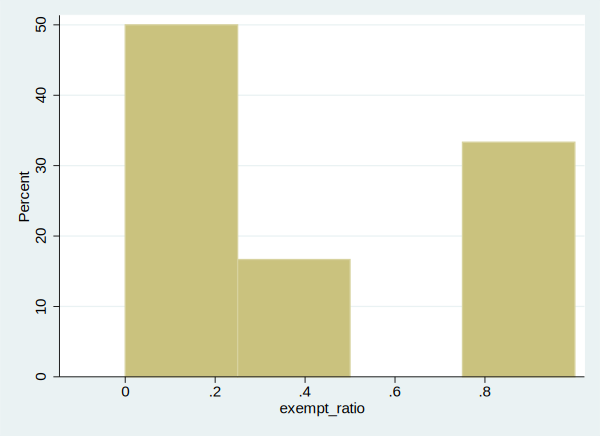

In [484]:
/* list ISIC4 total_exempt_value total_vat_value exempt_ratio */
hist exempt_ratio, percent

In [485]:
keep  total_exempt_value total_taxable_value exempt_ratio ComSector

In [486]:
export excel using "ComSector_exempt_ratio_`year'_`RU'.xlsx", replace firstrow(variables)

file ComSector_exempt_ratio_98_R.xlsx saved
